# 1. Problem Statement

## We are Working on Unsupervised learning peoblem . Developing text and data mining tools that can help the medical community develop answers to high priority scientific questions. The CORD-19 dataset represents the most extensive machine-readable coronavirus literature collection available for data mining to date. That will allow us to apply text and data mining approaches to find answers to the below tasks:
1. What is known about transmission, incubation, and environmental stability?
1. What do we know about COVID-19 risk factors?
1. What do we know about virus genetics, origin, and evolution?
1. What do we know about vaccines and therapeutics?
1. What do we know about non-pharmaceutical interventions?
1. What do we know about diagnostics and surveillance?
1. What has been published about medical care?
1. What has been published about information sharing and inter-sectoral collaboration?
1. What has been published about ethical and social science considerations?


# 2. Problem Solving
## We Will Follow the below Flow Charts  in our Problem Solving:
## 1st Flow chart for Unsupervised Machine Learning algorithm that we will apply to Articles Words to group them in Clusters depending on theier similarities , and reaching to the optimum number of Clusters. 
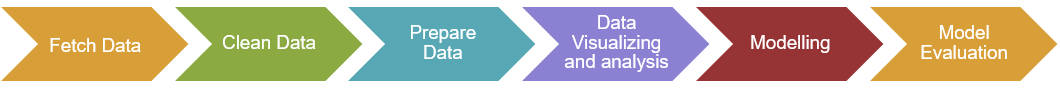

## 2nd Flow Chart showing how to filter the all Articles that we have around (29,323) Article , and Filtering them according to our Tasks(9 Tasks) , by applying NLP Techniques as shown Below:




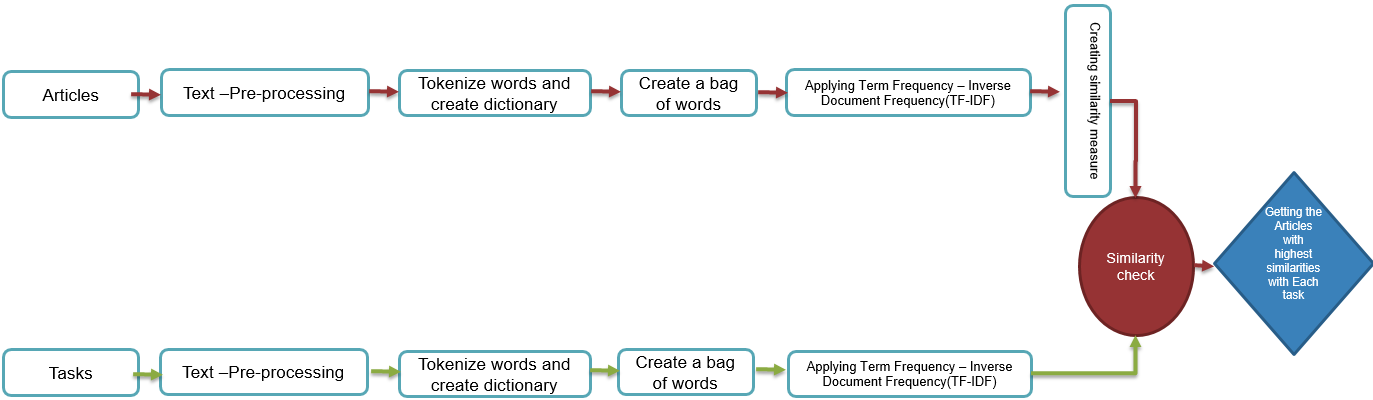

## 2.1 Fetching Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#Metadata_df=pd.read_csv('/kaggle/input/CORD-19-research-challenge/2020-03-13/all_sources_metadata_2020-03-13.csv')
Metadata_df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')

In [ ]:
print('shape' ,Metadata_df.shape)


In [ ]:
print('info',Metadata_df.info())


In [ ]:

print('Top 10',Metadata_df.head())


In [ ]:
print('Last 10',Metadata_df.tail())

In [ ]:
missing_data=(Metadata_df.isnull().sum(axis=0)/Metadata_df.shape[0])*100
missing_data

## 3.  Data Cleaning and Visualization

In [ ]:
#I will Drop the Columns WHO #Covidence and Microsoft Academic Paper ID , the they have more than 96 % of Missing Data
Metadata_df=Metadata_df.drop(['WHO #Covidence', 'Microsoft Academic Paper ID'], axis=1)

In [ ]:
Metadata_df.nunique()

In [ ]:
Metadata_df=Metadata_df.dropna(subset =['sha']) 

In [ ]:
Metadata_df.shape

In [ ]:
Metadata_df.info()

In [ ]:
Metadata_df.nunique()

In [ ]:
Metadata_df=Metadata_df.reset_index(drop=True)

In [ ]:
Metadata_df.tail()

## 4.1 Data Visualization

In [ ]:
#textprops={'color':"b"}
import matplotlib.pyplot as plt
Metadata_df['journal'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.pie(figsize = (10,10),autopct = '%.2f%%',
                                                                           title = 'Top Ten Active Journals')
plt.title("Top Ten Active Journals", bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#Top 10 Authors
Metadata_df['authors'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.pie(figsize = (10,10), autopct = '%.2f%%',
                                                                           title = 'Top Ten Active authors')
plt.title("Top Ten authors", bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#Top 10 licens
Metadata_df['license'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.pie(figsize = (10,10), autopct = '%.2f%%',
                                                                           title = 'Top Ten license')
plt.title("Top Ten license", bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#Top 10 Time
Metadata_df['publish_time'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.pie(figsize = (10,10), autopct = '%.2f%%',
                                                                           title = 'Top Ten publish time')
plt.title("Top Ten publish time", bbox={'facecolor':'0.8', 'pad':5})

## 2.2  Fetching the Papers from Json Files :
### i will follow the below algorithm in fetching those json files:
https://www.kaggle.com/ivanegapratama/covid-eda-initial-exploration-tool


In [ ]:
import os
import json
import glob
import sys
sys.path.insert(0, "../")

root_path = '/kaggle/input/CORD-19-research-challenge/'

In [ ]:
data_docs = {"doc_id": [None], "source": [None], "title": [None],
                  "abstract": [None], "text_body": [None]}
data_docs = pd.DataFrame.from_dict(data_docs)
data_docs

In [ ]:
json_filenames = glob.glob(f'{root_path}/**/*.json', recursive=True)

In [ ]:
def return_docs_df(json_filenames, df, source):

    for file_name in json_filenames:

        row = {"doc_id": None, "source": None, "title": None,
              "abstract": None, "text_body": None}

        with open(file_name) as json_data:
            data = json.load(json_data)

            row['doc_id'] = data['paper_id']
            row['title'] = data['metadata']['title']

            # Now need all of abstract. Put it all in 
            # a list then use str.join() to split it
            # into paragraphs. 

            abstract_list = [data['abstract'][x]['text'] for x in range(len(data['abstract']) - 1)]
            abstract = "\n ".join(abstract_list)

            row['abstract'] = abstract

            # And lastly the body of the text. For some reason I am getting an index error
            # In one of the Json files, so rather than have it wrapped in a lovely list
            # comprehension I've had to use a for loop like a neanderthal. 
            
            # Needless to say this bug will be revisited and conquered. 
            
            body_list = []
            for _ in range(len(data['body_text'])):
                try:
                    body_list.append(data['body_text'][_]['text'])
                except:
                    pass

            body = "\n ".join(body_list)
            
            row['text_body'] = body
            
            # Now just add to the dataframe. 
            
            if source == 'b':
                row['source'] = "biorxiv"
            elif source == "c":
                row['source'] = "common_use_sub"
            elif source == "n":
                row['source'] = "non_common_use"
            elif source == "p":
                row['source'] = "pmc_custom_license"
            
            df = df.append(row, ignore_index=True)
    
    return df

In [ ]:
data_docs = return_docs_df(json_filenames, data_docs, 'b')
data_docs.shape

In [ ]:
data_docs=data_docs.drop(data_docs.index[0])

In [ ]:
data_docs.head()

In [ ]:
data_docs.info()

In [ ]:
missing_data=(data_docs.isnull().sum(axis=0)/data_docs.shape[0])*100
missing_data

In [ ]:
data_docs.nunique()

### Combining the MetaData and Docs Data

In [ ]:
Combined_data = pd.merge(data_docs,Metadata_df,left_on='doc_id',right_on='sha', how='left')


In [ ]:
Combined_data.shape

In [ ]:
Combined_data.info()

In [ ]:
Combined_data.head()

In [ ]:
Combined_data.shape

In [ ]:
Combined_data.tail()

In [ ]:
Combined_data.nunique()

In [ ]:
Combined_data.isnull().sum()

## 4.2 Data Visualization and analysis (Text Preprocessing)

### We Will follow the below chart for our CombinedData and our tasks for text preprocessing and data visualization:
#### 1-Articles , which we have collected from Json Files.
#### 2-Tasks , Which we will Combine together as we will see below
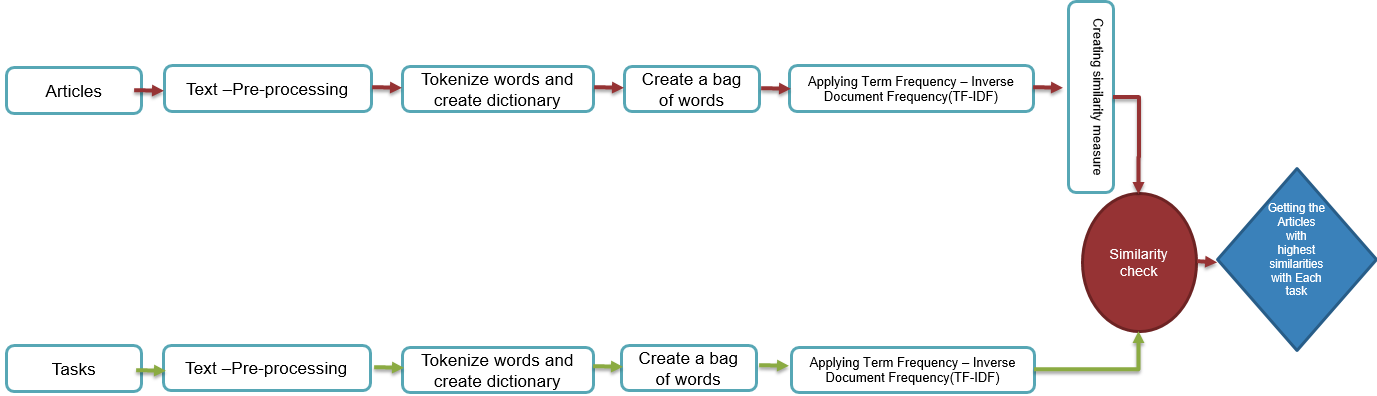

### 4.2.1 Text Pre-Processing

In [ ]:
Combined_data_processing=Combined_data
Combined_data_processing.info()

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter 
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gensim import corpora,models,similarities
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()


In [ ]:
# getting the lower case , removing stopwords and gettting the word origin
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def text_preprocessing(text):
    text= re.sub('[^a-zA-z0-9\s]','',text)
    text=lower_case(text)
    text=remove_stopwords(text)
    text=stemSentence(text)    
    return text

In [ ]:
#Combined_data_processing['text_body']=Combined_data_processing['text_body'].apply(lambda x: text_preprocessing(x))


In [ ]:
#Combined_data_processing['abstract_x']=Combined_data_processing['abstract_x'].apply(lambda x: text_preprocessing(x))
#Combined_data_processing['title_x']=Combined_data_processing['title_x'].apply(lambda x: text_preprocessing(x))

In [ ]:
# saving the processed data to csv file 
#Combined_data_Processed =Combined_data_processing.to_csv('Combined_data_processed.csv')

In [ ]:
Combined_data_processing = pd.read_csv('/kaggle/input/combined-dataset-processed/Combined_data_processed.csv')

In [ ]:
Combined_data_processing.info()

In [ ]:
Combined_data_processing[Combined_data_processing.text_body.isnull()]
#Combined_data_processing.loc(Combined_data_processing['text_body']==)
#data_docs['text_body'][data_docs.doc_id=='ed5d3f1db5936c2b86eb9ea46eab96a0b67a124e']

In [ ]:
Combined_data_processing.tail()

In [ ]:
Combined_data_processing.isnull().sum()

In [ ]:
Combined_data_processing['text_body'].tail()

In [ ]:
#removing Empty Texts
Combined_data_processing=Combined_data_processing.dropna(subset =['text_body']) 
Combined_data_processing=Combined_data_processing.reset_index(drop=True)

In [ ]:
Combined_data_processing.info()

In [ ]:
Combined_data_processing.nunique()

In [ ]:
Combined_data_processing.shape

### 4.2.2.1   Word Cloud for Words in Texts

In [ ]:

#corpus_text = [] # intializing list of collection of  clean reviews

#for i in range(0, 29323):
 #   for word in str(Combined_data_processing['text_body'][i]).split():
  #      corpus_text.append(word)


In [ ]:
 #removing the words less than four chars 
#corpus_text_modified=[i for i in corpus_text if 5 <=  len(i)]


In [ ]:
#len(corpus_text_modified)

### We have more than 56,590,638 Words in our Articles 

In [ ]:
unique_string=(" ").join(corpus_text_modified)
wordcloud = WordCloud(width = 1000, height = 500 ,max_words=1000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()    


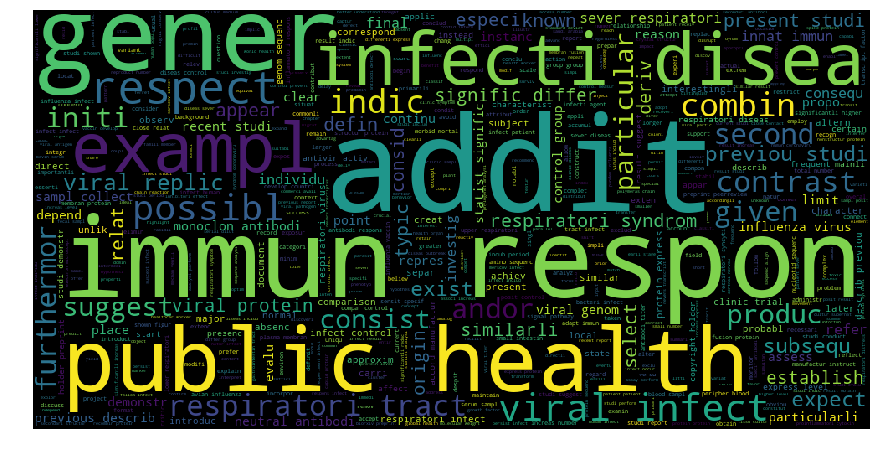

### 4.2.2.2 Word Cloud for Words in Titles

In [ ]:
corpus_title = [] # intializing list of collection of  clean reviews

for i in range(0, 29323):
    for word in str(Combined_data_processing['title_x'][i]).split():
        corpus_title.append(word)


In [ ]:
len(corpus_title)

In [ ]:
 
removed_words= ['nan', 'missed']  
for word in list(corpus_title):  # iterating on a copy since removing will mess things up
    if word in removed_words:
        corpus_title.remove(word)

In [ ]:
unique_string=(" ").join(corpus_title)
wordcloud = WordCloud(width = 1000, height = 500 ,max_words=10000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()    

### 4.2.2.3 Word Cloud for Words in abstract

In [ ]:
corpus_abstract = [] # intializing list of collection of  clean reviews

for i in range(0, 29323):
    for word in str(Combined_data_processing['abstract_x'][i]).split():
        corpus_abstract.append(word)

In [ ]:
len(corpus_abstract)

In [ ]:
removed_words= ['nan', 'missed']  
for word in list(corpus_abstract):  # iterating on a copy since removing will mess things up
    if word in removed_words:
        corpus_abstract.remove(word)

In [ ]:
corpus_abstract=[i for i in corpus_abstract if 4 <=  len(i)]

In [ ]:
unique_string=(" ").join(corpus_abstract)
wordcloud = WordCloud(width = 1000, height = 500 ,max_words=10000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()    

### 4.2.2.4  Plotting Histogram for most common Words(Top 100) in Texts ,Titles and abstratct

#### 4.2.2.4.1    Most Frequent Words in Texts (Top 100)

In [ ]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

counter_text = Counter(corpus_text) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = dict(counter_text.most_common(100)) 
  
print(most_occur) 

labels, values = zip(*most_occur.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))
plt.figure(figsize=(20,40))
plt.barh(labels, values)
plt.title('The most frequent words in Articles Texts',**title_font)
plt.xlabel('Number of Words',**axis_font)
plt.ylabel('Top 100 Words in Texts',**axis_font)

# add labels
#plt.xticks(indexes + bar_width, labels)
plt.show()



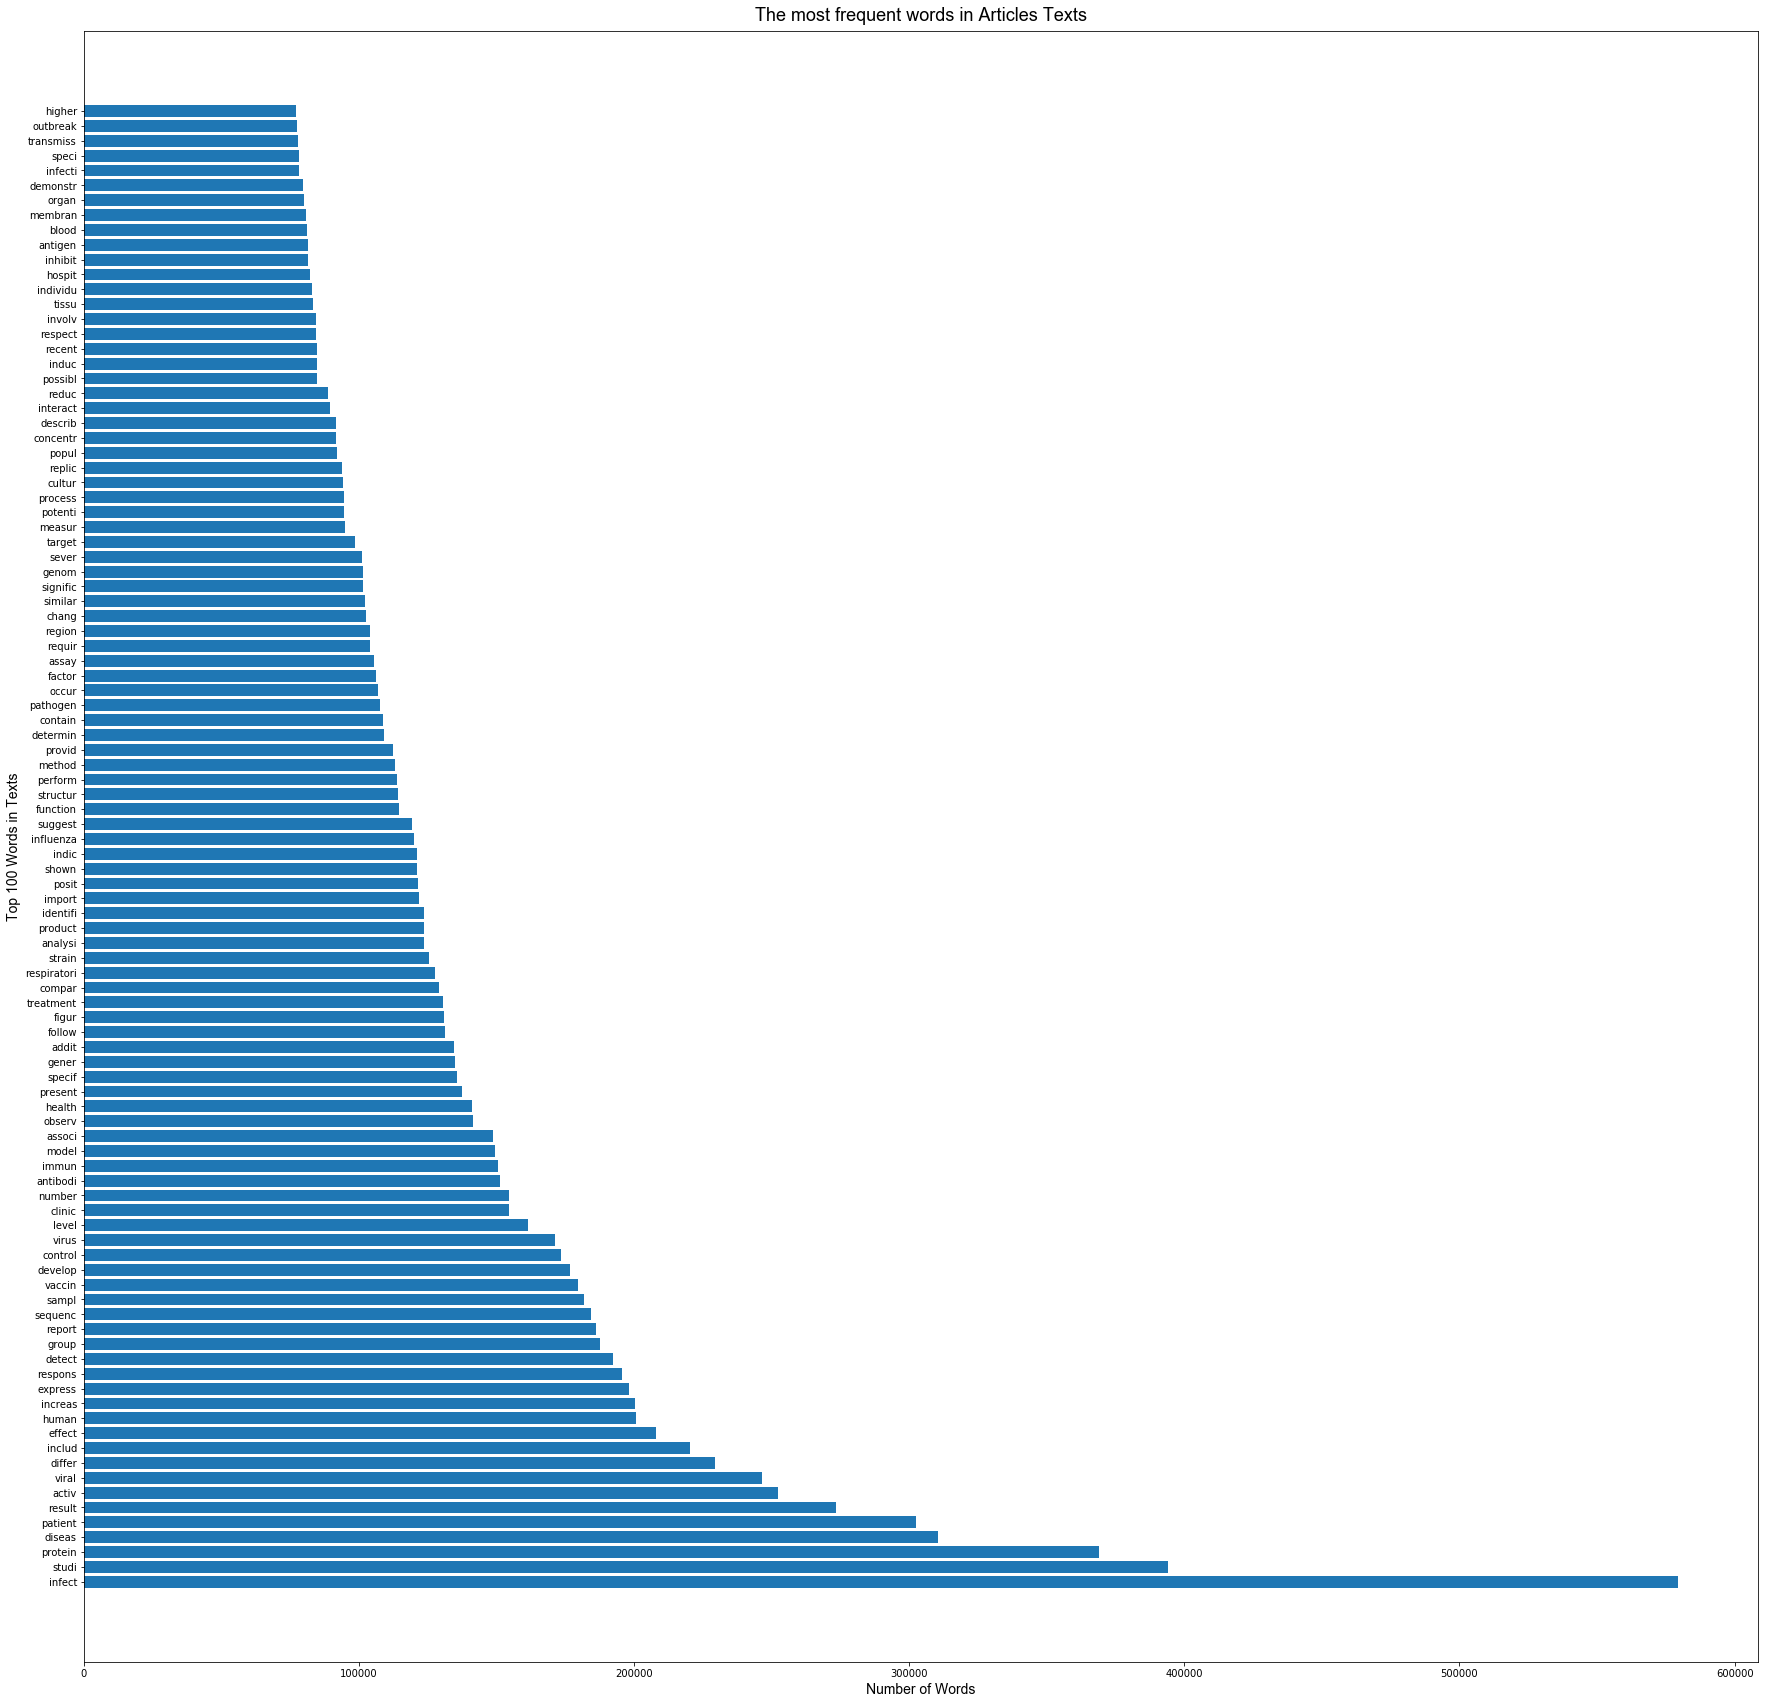

#### 4.2.2.4.2  Most Frequent Words in Titles (Top 100)

In [ ]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}
counter_title = Counter(corpus_title) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = dict(counter_title.most_common(100)) 
  
print(most_occur) 

labels, values = zip(*most_occur.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))
plt.figure(figsize=(20,40))
plt.barh(labels, values)
plt.title('The most frequent words in Articles Titles',**title_font,bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Number of Words',**axis_font,color='black')
plt.ylabel('Top 100 Words in Titles',**axis_font,color='black')
plt.xticks(color='black')
plt.yticks(color='black')
# add labels
#plt.xticks(indexes + bar_width, labels)
plt.show()


#### 4.2.2.4.3  Most Frequent Words in Abstracts (Top 100)

In [ ]:
counter_abstract = Counter(corpus_abstract) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = dict(counter_abstract.most_common(100)) 
  
print(most_occur) 

labels, values = zip(*most_occur.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))
plt.figure(figsize=(20,40))
plt.barh(labels, values)
plt.title('The most frequent words in Articles Abstract',**title_font,bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Number of Words',**axis_font,color='black')
plt.ylabel('Top 100 Words in Abstracts',**axis_font,color='black')
plt.xticks(color='black')
plt.yticks(color='black')
# add labels
#plt.xticks(indexes + bar_width, labels)
plt.show()


##  5. Modelling

In [ ]:
#Implementing TFIDF 
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Combined_data_processing['text_body'].values)

#implementing K-Means
k = 15
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())
            
print(pca.components_)
print(pca.explained_variance_)



In [ ]:
#implementing K-Means Clustering
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("PCA - Clustered (K-Means)",**title_font,bbox={'facecolor':'0.8', 'pad':5})
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_pred, 
    cmap='tab10'
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')

plt.title("PCA - Clustered (K-Means)-3D",**title_font,bbox={'facecolor':'0.9', 'pad':2})
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()


## 6. Model Evaluation 

In [ ]:
#Getting the best number of clusters using elbow method
import time
def elbow_plot(data, start_K, end_K, step):
    '''
    Generate an elbow plot to find optimal number of clusters
    graphing K values from start_K to end_K every step value
    
    INPUT: 
        data: Demographics DataFrame
        start_K: Inclusive starting value for cluster number
        end_K: Exclusive stopping value for cluster number
        step: Step value between start_K and end_K
    OUTPUT: Trimmed and cleaned demographics DataFrame
    '''
    score_list = []

    for i in range(start_K, end_K, step):
        print(i)
        start = time.time()
        kmeans = MiniBatchKMeans(i)
        model = kmeans.fit(data)
        score = model.score(data)
        score_list.append(abs(score))
        end = time.time()
        elapsed_time = end - start
        print(elapsed_time)

    plt.plot(range(start_K, end_K, step), 
    score_list, linestyle='--', marker='o', color='b');
    plt.xlabel('# of clusters K');
    plt.ylabel('Sum of squared errors');
    plt.title('SSE vs. K');
    plt.savefig('elbow_plot.png')
elbow_plot(pca_result, 1, 20, 1)    



## Conclusion
1. -This scatter plot is generated from Articles text , each article text is a feature. 
1. -usinig features vector TfidfVectorizer. 
1. -Dimensionality Reduction using PCA.
1. -generating clustering using k-Means where k=15 (the best value as elbow plot).
1. -Topic Modeling is done on each cluster to get the keywords per cluster. 

## 4.2.3 Creating Bag of Words 
## 4.2.4 Creating TF-IDF
## 4.2.5 Creating Cosine Similarity


In [ ]:
def review_to_words(text):
    words = word_tokenize(str(text)) # Split string into words
    
    return words
       


In [ ]:
Combined_data_processing['text_body'] = Combined_data_processing['text_body'].apply(lambda x: review_to_words(x))

docs = [] # intializing list of collection of  clean reviews
for i in range(0, 29322):
    docs.append(Combined_data_processing['text_body'][i])
    
dictionary = corpora.Dictionary(docs)
bag_of_words = [dictionary.doc2bow(gen_doc) for gen_doc in docs]


tf_idf = models.TfidfModel(bag_of_words)
#for doc in tf_idf[bag_of_words]:
 #   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])
sims = similarities.Similarity('sims',tf_idf[bag_of_words],
                                        num_features=len(dictionary))
    
print(bag_of_words[10000]) 

### Creating Bag of Words for Tasks (The tasks discription as it is in COVID-19 Open Research Dataset Challenge (CORD-19))

In [ ]:
tasks = [("""What is known about transmission, incubation, and environmental stability? What do we know about natural history, transmission, and diagnostics for the virus? What have we learned about infection prevention and control?Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery Prevalence of asymptomatic shedding and transmission (e.g., particularly children) Seasonality of transmission Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding).Persistence and stability on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood).Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic),'\ 
          'Natural history of the virus and shedding of it from an infected person,'\ 
          'Implementation of diagnostics and products to improve clinical processes,'\   
          'Disease models, including animal models for infection, disease and transmission,'\
' Tools and studies to monitor phenotypic change and potential adaptation of the virus,'\
' Immune response and immunity,'\
' Effectiveness of movement control strategies to prevent secondary transmission in health care and community settings,'\
' Effectiveness of personal protective equipment (PPE) and its usefulness to reduce risk of transmission in health care and community settings,'\
' Role of the environment in transmission"""),
         (""" What do we know about COVID-19 risk factors? What have we learned from epidemiological studies? ,'\
          'Data on potential risks factors,'\
          'Smoking, pre-existing pulmonary disease,'\
          'Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities ,'\
          'Neonates and pregnant women ,'\
          'Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.,'\
          'Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors ,'\
          'Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups ,'\
          'Susceptibility of populations,'\
          'Public health mitigation measures that could be effective for control"""),
         ("""What do we know about virus genetics, origin, and evolution? What do we know about the virus origin and management measures at the human-animal interface?,'\
          'Real-time tracking of whole genomes and a mechanism for coordinating the rapid dissemination of that information to inform the development of diagnostics and therapeutics and to track variations of the virus over time ,'\
          'Access to geographic and temporal diverse sample sets to understand geographic distribution and genomic differences, and determine whether there is more than one strain in circulation. Multi-lateral agreements such as the Nagoya Protocol could be leveraged ,'\
          'Evidence that livestock could be infected (e.g., field surveillance, genetic sequencing, receptor binding) and serve as a reservoir after the epidemic appears to be over ,'\
          'Evidence of whether farmers are infected, and whether farmers could have played a role in the origin.,'\
' Surveillance of mixed wildlife- livestock farms for SARS-CoV-2 and other coronaviruses in Southeast Asia.,'\
' Experimental infections to test host range for this pathogen ,'\
' Animal host(s) and any evidence of continued spill-over to humans ,'\
' Socioeconomic and behavioral risk factors for this spill-over ,'\
' Sustainable risk reduction strategies """),
         (""" What do we know about vaccines and therapeutics? What has been published concerning research and development and evaluation efforts of vaccines and therapeutics?,'\
          'Effectiveness of drugs being developed and tried to treat COVID-19 patients.,'\
          'Clinical and bench trials to investigate less common viral inhibitors against COVID-19 such as naproxen, clarithromycin, and minocyclinethat that may exert effects on viral replication.,'\
          'Methods evaluating potential complication of Antibody-Dependent Enhancement (ADE) in vaccine recipients.,'\
          'Exploration of use of best animal models and their predictive value for a human vaccine ,'\
          'Capabilities to discover a therapeutic (not vaccine) for the disease, and clinical effectiveness studies to discover therapeutics, to include antiviral agents.,'\
          'Alternative models to aid decision makers in determining how to prioritize and distribute scarce, newly proven therapeutics as production ramps up. This could include identifying approaches for expanding production capacity to ensure equitable and timely distribution to populations in need.,'\
          'Efforts targeted at a universal coronavirus vaccine.,'\ 
          'Efforts to develop animal models and standardize challenge studies,'\
          'Efforts to develop prophylaxis clinical studies and prioritize in healthcare workers,'\
          'Approaches to evaluate risk for enhanced disease after vaccination,'\
          'Assays to evaluate vaccine immune response and process development for vaccines, alongside suitable animal models [in conjunction with therapeutics]"""),
         ("""What do we know about the effectiveness of non-pharmaceutical interventions? What is known about equity and barriers to compliance for non-pharmaceutical interventions?,'\
          'Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases ,'\
          'Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments.,'\
          'Rapid assessment of the likely efficacy of school closures, travel bans, bans on mass gatherings of various sizes, and other social distancing approaches.,'\
          'Methods to control the spread in communities, barriers to compliance and how these vary among different populations.,'\
          'Models of potential interventions to predict costs and benefits that take account of such factors as race, income, disability, age, geographic location, immigration status, housing status, employment status, and health insurance status.,'\
          'Policy changes necessary to enable the compliance of individuals with limited resources and the underserved with NPIs.,'\
          'Research on why people fail to comply with public health advice, even if they want to do so (e.g., social or financial costs may be too high).,'\
          'Research on the economic impact of this or any pandemic. This would include identifying policy and programmatic alternatives that lessen/mitigate risks to critical government services, food distribution and supplies, access to critical household supplies, and access to health diagnoses, treatment, and needed care, regardless of ability to pay."""),
         ("""What do we know about diagnostics and surveillance? What has been published concerning systematic, holistic approach to diagnostics (from the public health surveillance perspective to being able to predict clinical outcomes)?,'\
          'How widespread current exposure is to be able to make immediate policy recommendations on mitigation measures. Denominators for testing and a mechanism for rapidly sharing that information, including demographics, to the extent possible. Sampling methods to determine asymptomatic disease (e.g., use of serosurveys (such as convalescent samples) and early detection of disease (e.g., use of screening of neutralizing antibodies such as ELISAs).,'\
          'Efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms.,'\
          'Recruitment, support, and coordination of local expertise and capacity (public, private—commercial, and non-profit, including academic), including legal, ethical, communications, and operational issues.,'\
          'National guidance and guidelines about best practices to states (e.g., how states might leverage universities and private laboratories for testing purposes, communications to public health officials and the public).,'\
          'Development of a point-of-care test (like a rapid influenza test) and rapid bed-side tests, recognizing the tradeoffs between speed, accessibility, and accuracy.,'\
          'Rapid design and execution of targeted surveillance experiments calling for all potential testers using PCR in a defined area to start testing and report to a specific entity. These experiments could aid in collecting longitudinal samples, which are critical to understanding the impact of ad hoc local interventions (which also need to be recorded).,'\
          'Separation of assay development issues from instruments, and the role of the private sector to help quickly migrate assays onto those devices.,'\
          'Efforts to track the evolution of the virus (i.e., genetic drift or mutations) and avoid locking into specific reagents and surveillance/detection schemes.,'\
          'Latency issues and when there is sufficient viral load to detect the pathogen, and understanding of what is needed in terms of biological and environmental sampling.,'\
          'Use of diagnostics such as host response markers (e.g., cytokines) to detect early disease or predict severe disease progression, which would be important to understanding best clinical practice and efficacy of therapeutic interventions.,'\
          'Policies and protocols for screening and testing.,'\
          'Policies to mitigate the effects on supplies associated with mass testing, including swabs and reagents.,'\
          'Technology roadmap for diagnostics.,'\
          'Barriers to developing and scaling up new diagnostic tests (e.g., market forces), how future coalition and accelerator models (e.g., Coalition for Epidemic Preparedness Innovations) could provide critical funding for diagnostics, and opportunities for a streamlined regulatory environment.,'\
          'New platforms and technology (e.g., CRISPR) to improve response times and employ more holistic approaches to COVID-19 and future diseases.,'\
          'Coupling genomics and diagnostic testing on a large scale.,'\
          'Enhance capabilities for rapid sequencing and bioinformatics to target regions of the genome that will allow specificity for a particular variant.,'\
          'Enhance capacity (people, technology, data) for sequencing with advanced analytics for unknown pathogens, and explore capabilities for distinguishing naturally-occurring pathogens from intentional.,'\
          'One Health surveillance of humans and potential sources of future spillover or ongoing exposure for this organism and future pathogens, including both evolutionary hosts (e.g., bats) and transmission hosts (e.g., heavily trafficked and farmed wildlife and domestic food and companion species), inclusive of environmental, demographic, and occupational risk factors."""),
         ("""What has been published about medical care? What has been published concerning surge capacity and nursing homes? What has been published concerning efforts to inform allocation of scarce resources? What do we know about personal protective equipment? What has been published concerning alternative methods to advise on disease management? What has been published concerning processes of care? What do we know about the clinical characterization and management of the virus?,'\
          'Resources to support skilled nursing facilities and long term care facilities.,'\ 
          'Mobilization of surge medical staff to address shortages in overwhelmed communities ,'\
          'Age-adjusted mortality data for Acute Respiratory Distress Syndrome (ARDS) with/without other organ failure – particularly for viral etiologies,'\
          'Extracorporeal membrane oxygenation (ECMO) outcomes data of COVID-19 patients,'\
          'Outcomes data for COVID-19 after mechanical ventilation adjusted for age.,'\
          'Knowledge of the frequency, manifestations, and course of extrapulmonary manifestations of COVID-19, including, but not limited to, possible cardiomyopathy and cardiac arrest.,'\
          'Application of regulatory standards (e.g., EUA, CLIA) and ability to adapt care to crisis standards of care level.,'\
          'Approaches for encouraging and facilitating the production of elastomeric respirators, which can save thousands of N95 masks.,'\
          'Best telemedicine practices, barriers and faciitators, and specific actions to remove/expand them within and across state boundaries.,'\
          'Guidance on the simple things people can do at home to take care of sick people and manage disease.,'\
          'Oral medications that might potentially work.,'\
          'Use of AI in real-time health care delivery to evaluate interventions, risk factors, and outcomes in a way that could not be done manually.,'\
          'Best practices and critical challenges and innovative solutions and technologies in hospital flow and organization, workforce protection, workforce allocation, community-based support resources, payment, and supply chain management to enhance capacity, efficiency, and outcomes.,'\
          'Efforts to define the natural history of disease to inform clinical care, public health interventions, infection prevention control, transmission, and clinical trials,'\
          'Efforts to develop a core clinical outcome set to maximize usability of data across a range of trials ,'\
          'Efforts to determine adjunctive and supportive interventions that can improve the clinical outcomes of infected patients (e.g. steroids, high flow oxygen)"""),
         (""" What has been published about information sharing and inter-sectoral collaboration? What has been published about data standards and nomenclature? What has been published about governmental public health? What do we know about risk communication? What has been published about communicating with high-risk populations? What has been published to clarify community measures? What has been published about equity considerations and problems of inequity?,'\
          'Methods for coordinating data-gathering with standardized nomenclature.,'\
          'Sharing response information among planners, providers, and others.,'\
          'Understanding and mitigating barriers to information-sharing.,'\
          'How to recruit, support, and coordinate local (non-Federal) expertise and capacity relevant to public health emergency response (public, private, commercial and non-profit, including academic).,'\
          'Integration of federal/state/local public health surveillance systems.,'\
          'Value of investments in baseline public health response infrastructure preparedness ,'\
          'Modes of communicating with target high-risk populations (elderly, health care workers).,'\
          'Risk communication and guidelines that are easy to understand and follow (include targeting at risk populations’ families too).,'\
          'Communication that indicates potential risk of disease to all population groups.,'\
          'Misunderstanding around containment and mitigation.,'\
          'Action plan to mitigate gaps and problems of inequity in the Nation’s public health capability, capacity, and funding to ensure all citizens in need are supported and can access information, surveillance, and treatment.,'\
          'Measures to reach marginalized and disadvantaged populations.,'\
          'Data systems and research priorities and agendas incorporate attention to the needs and circumstances of disadvantaged populations and underrepresented minorities.,'\
          'Mitigating threats to incarcerated people from COVID-19, assuring access to information, prevention, diagnosis, and treatment.,'\
          'Understanding coverage policies (barriers and opportunities) related to testing, treatment, and care"""),
         ("""What has been published concerning ethical considerations for research? What has been published concerning social sciences at the outbreak response?,'\
          'Efforts to articulate and translate existing ethical principles and standards to salient issues in COVID-2019 ,'\
          'Efforts to embed ethics across all thematic areas, engage with novel ethical issues that arise and coordinate to minimize duplication of oversight ,'\
          'Efforts to support sustained education, access, and capacity building in the area of ethics ,'\
          'Efforts to establish a team at WHO that will be integrated within multidisciplinary research and operational platforms and that will connect with existing and expanded global networks of social sciences.,'\
          'Efforts to develop qualitative assessment frameworks to systematically collect information related to local barriers and enablers for the uptake and adherence to public health measures for prevention and control. This includes the rapid identification of the secondary impacts of these measures. (e.g. use of surgical masks, modification of health seeking behaviors for SRH, school closures),'\
          'Efforts to identify how the burden of responding to the outbreak and implementing public health measures affects the physical and psychological health of those providing care for Covid-19 patients and identify the immediate needs that must be addressed.,'\
          'Efforts to identify the underlying drivers of fear, anxiety and stigma that fuel misinformation and rumor, particularly through social media.""")
]

In [ ]:

from gensim.parsing.preprocessing import remove_stopwords
porter = PorterStemmer()
tasks_data=pd.DataFrame(tasks)
tasks_data.columns=['task_description']


tasks_data['task_description']=tasks_data['task_description'].apply(lambda x: text_preprocessing(x))


import re
def review_to_words(text):
    words = word_tokenize(str(text)) # Split string into words
    
    return words

tasks_data['task_description']=tasks_data['task_description'].apply(lambda x: review_to_words(x))

docs_tasks = [] # intializing list of collection of  clean reviews
for i in range(0, 9):
    docs_tasks.append(tasks_data['task_description'][i])


In [ ]:
len(docs_tasks)

## creating Bag of Words for each Tasg and checking for Similarity

In [ ]:
query_doc_bow0 = dictionary.doc2bow(docs_tasks[0])    
query_doc_tf_idf0 = tf_idf[query_doc_bow0]

comparing_results0=sims[query_doc_tf_idf0]


max_results0=sorted(range(len(comparing_results0)), key=lambda i: comparing_results0[i], reverse=True)[:100]

#for i in range(0,100):
 #   print(Combined_data_processing['doc_id'][max_results0[i]])


In [ ]:
query_doc_bow1 = dictionary.doc2bow(docs_tasks[1])    
query_doc_tf_idf1 = tf_idf[query_doc_bow1]

comparing_results1=sims[query_doc_tf_idf1]


max_results1=sorted(range(len(comparing_results1)), key=lambda i: comparing_results1[i], reverse=True)[:100]

In [ ]:
query_doc_bow2 = dictionary.doc2bow(docs_tasks[2])    
query_doc_tf_idf2 = tf_idf[query_doc_bow2]

comparing_results2=sims[query_doc_tf_idf2]


max_results2=sorted(range(len(comparing_results2)), key=lambda i: comparing_results2[i], reverse=True)[:100]

In [ ]:
query_doc_bow3 = dictionary.doc2bow(docs_tasks[3])    
query_doc_tf_idf3 = tf_idf[query_doc_bow3]

comparing_results3=sims[query_doc_tf_idf3]
max_results3=sorted(range(len(comparing_results3)), key=lambda i: comparing_results3[i], reverse=True)[:100]

In [ ]:
query_doc_bow4 = dictionary.doc2bow(docs_tasks[4])    
query_doc_tf_idf4 = tf_idf[query_doc_bow4]

comparing_results4 =sims[query_doc_tf_idf4]
max_results4 =sorted(range(len(comparing_results4)), key=lambda i: comparing_results4[i], reverse=True)[:100]

In [ ]:
query_doc_bow5 = dictionary.doc2bow(docs_tasks[5])    
query_doc_tf_idf5 = tf_idf[query_doc_bow5]

comparing_results5 =sims[query_doc_tf_idf5]
max_results5 =sorted(range(len(comparing_results5)), key=lambda i: comparing_results5[i], reverse=True)[:100]

In [ ]:
query_doc_bow6 = dictionary.doc2bow(docs_tasks[6])    
query_doc_tf_idf6 = tf_idf[query_doc_bow6]

comparing_results6 =sims[query_doc_tf_idf6]
max_results6 =sorted(range(len(comparing_results6)), key=lambda i: comparing_results6[i], reverse=True)[:100]

In [ ]:
query_doc_bow7 = dictionary.doc2bow(docs_tasks[7])    
query_doc_tf_idf7 = tf_idf[query_doc_bow7]

comparing_results7 =sims[query_doc_tf_idf7]
max_results7 =sorted(range(len(comparing_results7)), key=lambda i: comparing_results7[i], reverse=True)[:100]

In [ ]:
query_doc_bow8 = dictionary.doc2bow(docs_tasks[8])    
query_doc_tf_idf8 = tf_idf[query_doc_bow8]

comparing_results8 =sims[query_doc_tf_idf8]
max_results8 =sorted(range(len(comparing_results8)), key=lambda i: comparing_results8[i], reverse=True)[:100]

In [ ]:
#comparing_results8[max_results8[0]]

In [ ]:
#Article1=Combined_data['text_body'][(Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[0]])]
#print (Combined_data['text_body'][(Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[0]])].to_string(index=False))

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 500)

# Tasks Filtering (We will present the first 100 most coorelated  Articles related to each task)
# See how is the close coorelation between tasks and related articles.

 # The First Task: What is known about transmission, incubation, and environmental stability?

In [ ]:
from termcolor import colored
from colorama import Fore
from IPython.core.display import display, HTML
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]

print('                                       TOP-100 Releated Documents to Task1              ')
for i in range(0,100):
    
   
  #  print(f'                                     [          #{count}                ]')
    
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
 #   display(HTML(final_link))
   # print(f"{Fore.RED}Document Link     :{display(document_link)}")
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False))
    Similarity.append(comparing_results0[max_results0[i]])
    
    
#    print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)} ")
 #   print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
  #  print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
   # print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
   # print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results0[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))
#display(HTML(Document_ID.to_html(escape=False,index=False))).to_csv('Task1.csv',index = False)

# The Second Task : What do we know about COVID-19 risk factors?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]
    
for i in range(0,100):
    #print(f'[ #{count} ]')
   # print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)} ")
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
 #   display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False))
    Similarity.append(comparing_results1[max_results1[i]])
    
 #   print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
  #  print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
   # print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
   # print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
   # print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results1[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))         

# The Third Task : What do we know about virus genetics, origin, and evolution?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]
for i in range(0,100):
   # print(f'[ #{count} ]')
    #print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)} ")
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
  #  display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False))
    Similarity.append(comparing_results2[max_results2[i]])
   # print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
   # print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results2[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))       

# The Fourth Task : What do we know about vaccines and therapeutics?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]


for i in range(0,100):
   # print(f'[ #{count} ]')
   # print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)} ")
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
    #display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False))
    Similarity.append(comparing_results3[max_results3[i]])
   # print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
   # print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
   # print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
   # print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
   # print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results3[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal'])
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))     
    
    

# The Fifth Task : What do we know about non-pharmaceutical interventions?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]

for i in range(0,100):
    #print(f'[ #{count} ]')
    #print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)} ")
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
    #display(HTML(final_link)) 
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False))
    Similarity.append(comparing_results4[max_results4[i]])
    
    #print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results4[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))         

# The Sixth Task : What do we know about diagnostics and surveillance?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]



for i in range(0,100):
  #  print(f'[ #{count} ]')
   # print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)} ")
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
  #  display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False))
    Similarity.append(comparing_results5[max_results5[i]])
    #print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results5[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))     

# The Seventh Task : What has been published about medical care?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]

for i in range(0,100):
   # print(f'[ #{count} ]')
   
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
    #display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False))
    Similarity.append(comparing_results6[max_results6[i]])
   # print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)} ")
   # print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results6[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))      

# The Eighth Task : What has been published about information sharing and inter-sectoral collaboration?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]



for i in range(0,100):
  #  print(f'[ #{count} ]')
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
   # display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False))
    Similarity.append(comparing_results7[max_results7[i]])
    #print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)} ")
    #print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results7[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))      

# The Nineth Task : What has been published about ethical and social science considerations?

In [ ]:
count=1
Title= []
Publish_Time=[]
Author=[]
Document_ID=[]
Journal=[]
Similarity=[]



for i in range(0,100):
    #print(f'[ #{count} ]')
   
    link=(Combined_data['doi'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)).strip()
    title=Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)
    linka='https://doi.org/'+link
    linkb=title
    #final_link='<p align="left"><a href="{}">{}</a></p>'.format(linka,linkb)
   # display(HTML(final_link))
    
    Document_ID.append(Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False))
    Title.append(final_link)
    Publish_Time.append(Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False))
    Author.append(Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False))
    Journal.append(Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False))
    Similarity.append(comparing_results8[max_results8[i]])
    #print(f"{Fore.YELLOW}Document ID      : {Combined_data['doc_id'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)} ")
    #print(f"{Fore.WHITE}Title          : {Combined_data['title_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print(f"{Fore.RED}Authors          : {Combined_data['authors'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Abstract       : {Combined_data['abstract_x'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print(f"{Fore.YELLOW}Publish Time  : {Combined_data['publish_time'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print(f"{Fore.GREEN}Journal        : {Combined_data['journal'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print(f"{Fore.WHITE}Complete Text        : {Combined_data['text_body'].loc[Combined_data['doc_id'] == Combined_data_processing['doc_id'][max_results8[i]]].to_string(index=False)}")
    #print("_____________________________________________________________________________________________________________________________________________________________________________________________________")
    count+=1
Document_ID= pd.DataFrame(Document_ID,columns=['Document_ID'])    
Title= pd.DataFrame(Title,columns=['Title'])  
Publish_Time= pd.DataFrame(Publish_Time,columns=['Publish_Time'])  
Author= pd.DataFrame(Author,columns=['Author'])  
Journal= pd.DataFrame(Journal,columns=['Journal']) 
Similarity=pd.DataFrame(Similarity,columns=['Similarity'])
Document_ID = pd.concat([Document_ID,Title,Publish_Time,Author,Journal,Similarity], axis=1)
Document_ID = Document_ID.reset_index(drop=True)
display(HTML(Document_ID.to_html(escape=False,index=False)))    